# Ejercicios 4 y 5

### Carga de datos de Iris

In [3]:
import pandas as pd
#Busqué la base de datos y la encontré en este repositorio de GITHUB
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
#Cargar base de datos desde URL
iris = pd.read_csv(url)

#Solo para ver si cargó bien
print(iris.head(5))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


### Ejercicio 4

##### Modo paramétrico

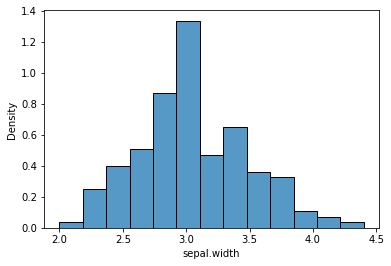

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Primero visualizamos los datos
sns.histplot(data=iris, x='sepal.width', stat='density')
plt.show()

Los datos parecen normales

In [5]:
from scipy.stats import shapiro, norm

#Como igual vamos a trabajar con esta variable, la guardamos para llamarla más fácil
ancho_sepalo = iris['sepal.width']

#verificamos la una prueba
print(shapiro(ancho_sepalo))

ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)


Dado que el p-value es mayor a 0.1 podemos decir que no hay evidencia sólida para descartar normalidad. Podemos proseguir.

In [6]:
import numpy as np

#Se calculan los estimadores MLE de la normal
mu_x = ancho_sepalo.mean()
sd_x = ancho_sepalo.std()

#Se calculan los estimadores MLE de los percentiles 25 y 75
#Definimos las probabilidades
probs = np.array([0.25,0.75])
#Se calculan los cuantiles y se calcula su diferencia
print(np.diff(norm.ppf(probs,loc=mu_x, scale=sd_x)))

[0.58797468]


##### No paramétrico

In [7]:
print(np.diff(np.quantile(ancho_sepalo, probs)))

[0.5]


### Ejercicio 5

In [19]:
#La simulación es como sigue:

#1. Selecciono una planta a medir (el ancho de sepalo). En otras palabras selecciono una medida conocida.
#2. Simulo medirla, es decir, le agrego un error de medición y reporto eso como la medición obtenida

#Paso 1, 
n_sim = 10000
mediciones_verdaderas = np.random.normal(loc=mu_x,scale=sd_x, size=n_sim)

#Paso 2
mediciones_reales = mediciones_verdaderas + np.random.normal(loc=0,scale=0.7, size=n_sim)

#Generamos el estimador 
mu_sim = np.mean(mediciones_reales)
sd_sim = np.std(mediciones_reales)
print(np.diff(norm.ppf(probs,loc=mu_sim, scale=sd_sim)))

[1.12664054]


In [23]:
#Otro sería usando la función de distribución empírica, pero usando la misma lógica

#Paso1
mediciones_verdaderas = np.random.choice(ancho_sepalo, size=n_sim, replace=True)

#Paso 2
mediciones_reales = mediciones_verdaderas + np.random.normal(loc=0,scale=0.7, size=n_sim)

#Dar el estimado
print(np.diff(np.quantile(mediciones_reales, probs)))

[1.11905862]


Note que ambas medidas son parecidas, igual que en el caso del ejercicio 4